# During this assignment i have tried differnt ways with different algos to attain best fit

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale,PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
metrics=pd.DataFrame()

In [3]:
house_data=pd.read_csv('kc_house_data-1.csv')

In [4]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
house_data.info() # Only date column is non integer remaining are int, float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [7]:
house_data.isnull().sum() # No null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
np.round(house_data.describe(include='all'))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,...,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,540088.0,3.0,2.0,2080.0,15107.0,1.0,0.0,0.0,...,8.0,1788.0,292.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12768.0
std,2.876566e+09,NaN,367127.0,1.0,1.0,918.0,41421.0,1.0,0.0,1.0,...,1.0,828.0,443.0,29.0,402.0,54.0,0.0,0.0,685.0,27304.0
min,1.000102e+06,NaN,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,...,1.0,290.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,NaN,321950.0,3.0,2.0,1427.0,5040.0,1.0,0.0,0.0,...,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,NaN,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,...,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,NaN,645000.0,4.0,2.0,2550.0,10688.0,2.0,0.0,0.0,...,8.0,2210.0,560.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0


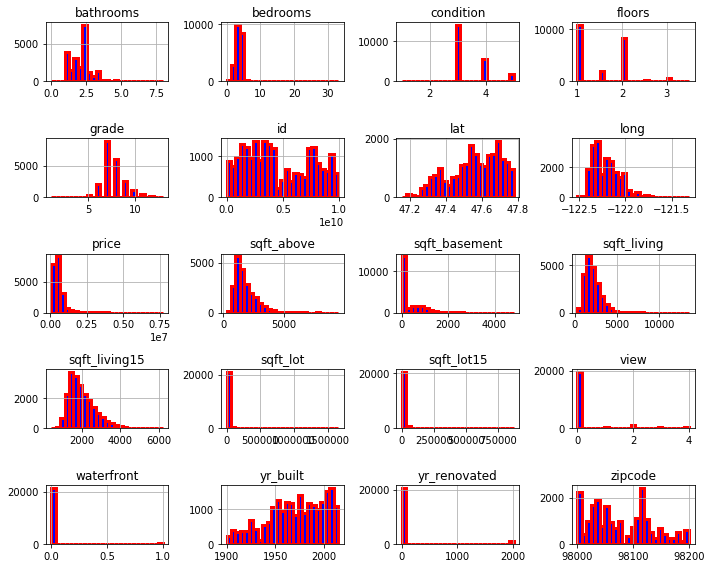

In [9]:
house_data.hist(figsize=(10,8),bins=25,color='b',linewidth='3',edgecolor='r')
plt.tight_layout()
plt.show()

In [10]:
house_data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [57]:
train_data,test_data = train_test_split(house_data,train_size = 0.8,random_state=3)

lr = LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)

C:\Users\Veni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [59]:
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtrsm

0.492

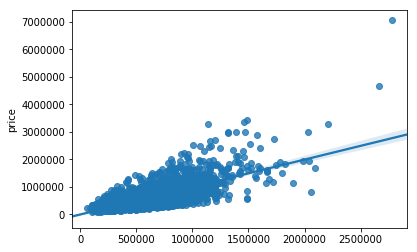

In [16]:
sns.regplot(Ypred,Test_data['price'])

# With single linear regression we are not getting fair result. Going forward i will analyse data more added some insights to build the model

In [19]:
sns.set(style='darkgrid')

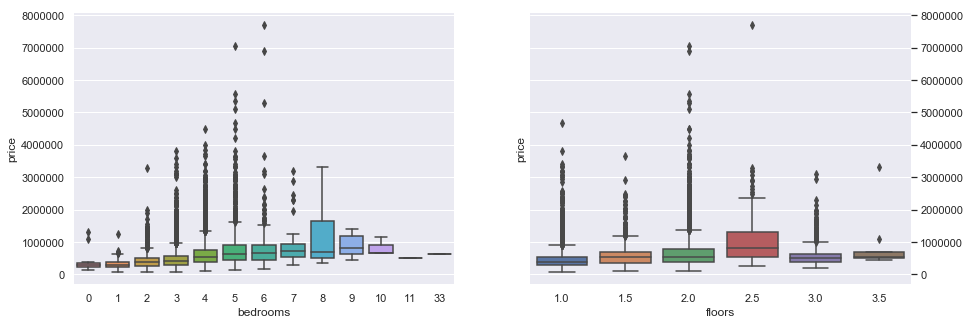

In [20]:
# Now using boxplot finding the relation between coloumn
f, axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(house_data['bedrooms'],house_data['price'],ax=axes[0])
sns.boxplot(house_data['floors'],house_data['price'],ax=axes[1])
sns.despine(left=True,bottom=True)
axes[1].yaxis.tick_right()
plt.show()
# From the blow Boxplot bedrooms don'have direct relation with price and floors

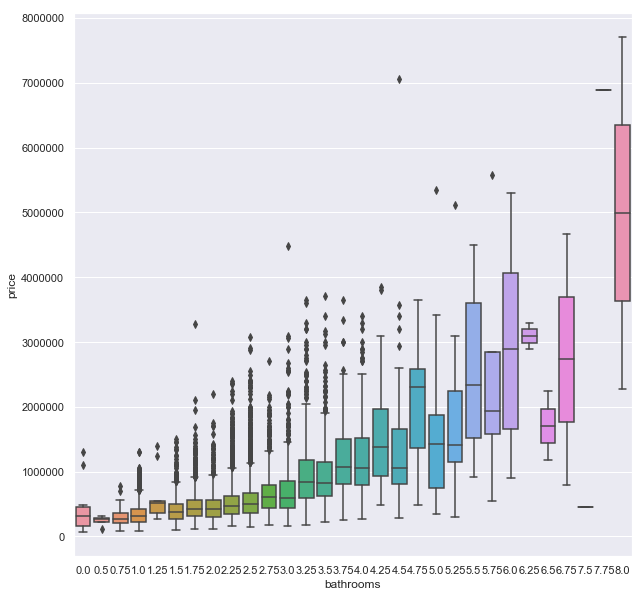

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(house_data['bathrooms'],house_data['price'])
# From the below boxplot we can say when there are bathrooms increased price is also increase

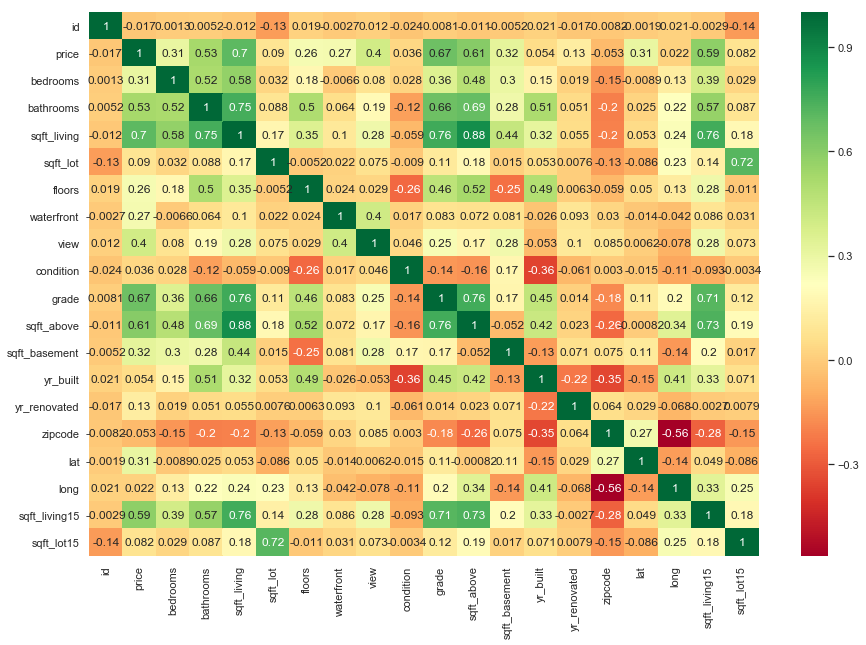

In [22]:

# Finding the coorelation between columns
plt.figure(figsize=(15,10))
sns.heatmap(house_data.corr(),annot=True,cmap='RdYlGn')
# From below Heatmap Bathrooms, bedroooms,sqft_living ,view.. have some good coorelation with the price

# Data preprocessing

In [23]:
# As we have date of sold and ybuilt so changing to Age columns
#Extraxting date
house_data['Sales_Year']=house_data['date'].apply(lambda x:int(x[0:4]))
house_data['Age']=house_data['Sales_Year']-house_data['yr_built']
house_data=house_data.drop(columns='date')

In [24]:
house_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Sales_Year,Age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


(array([3456., 2927., 2585., 2786., 2954., 2749., 1288., 1124.,  944.,
         800.]),
 array([ -1. ,  10.6,  22.2,  33.8,  45.4,  57. ,  68.6,  80.2,  91.8,
        103.4, 115. ]),
 <a list of 10 Patch objects>)

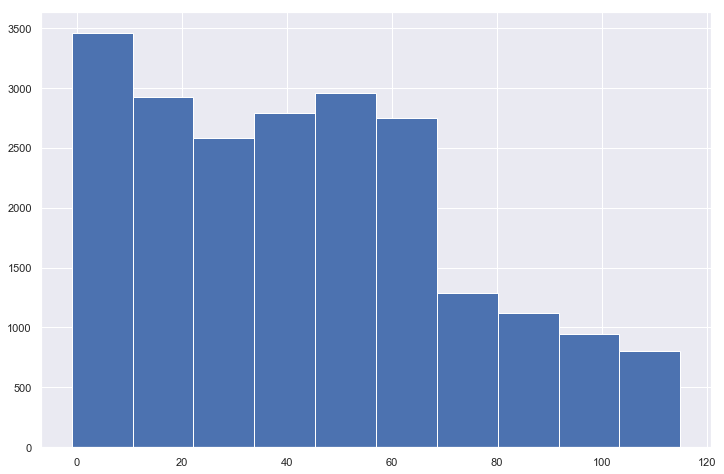

In [25]:
# visualizing the age using age
plt.figure(figsize=(12,8))

plt.hist(house_data['Age'])

In [26]:
# Adding age of rennovation
house_data['Age_rnv']=house_data['Sales_Year'][house_data['yr_renovated']!=0].astype(int)-house_data['yr_renovated'][house_data['yr_renovated']!=0]
house_data['Age_rnv'][house_data['Age_rnv'].isnull()]=0

C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
#Binning the Age 
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
house_data['age_binned'] = pd.cut(house_data['Age'], bins=bins, labels=labels)



In [28]:
#Age rennovation

bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
house_data['age_rnv_binned'] = pd.cut(house_data['Age_rnv'], bins=bins, labels=labels)


In [29]:
# Creating dummies 
house_data=pd.get_dummies(house_data,columns=['age_binned','age_rnv_binned'])

# Multiple linear regression 1

In [60]:

train_data_dm,test_data_dm = train_test_split(house_data,train_size = 0.8,random_state=3)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
Model_2 = LinearRegression()
Model_2.fit(train_data_dm[features],train_data_dm['price'])


C:\Users\Veni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
pred = Model_2.predict(test_data_dm[features])


In [63]:
#trainign score
Model_2.score(test_data_dm[features],test_data_dm['price'])

0.5188612547922418

In [64]:
#Testing score
Model_2.score(train_data_dm[features],train_data_dm['price'])

0.5141922138545283

# Multiple linear regreesion 2


In [65]:
#Applying Regression 
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']

In [66]:
Model_3=LinearRegression().fit(train_data_dm[features],train_data_dm['price'])

In [67]:
pred=Model_3.predict(test_data_dm[features])

In [69]:
r2_score(test_data_dm['price'],pred) # score is increased with More Features

0.6573756253498542

# Multiple linear regression 3 adding all features

In [71]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

In [72]:
Model_4=LinearRegression().fit(train_data_dm[features],train_data_dm['price'])
pred=Model_4.predict(test_data_dm[features])
r2_score(test_data_dm['price'],pred) # score is increased with More Features

0.7131690871261713

# Trying with Polynomial Features

In [83]:
polyfeat = PolynomialFeatures(degree=2)

X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly =LinearRegression().fit(X_trainpoly, train_data['price'])
pred=poly.predict(X_testpoly)

In [91]:
poly.score(X_trainpoly,train_data_dm['price']) #train accuracy

0.8403752727314868

In [104]:
poly.score(X_testpoly,test_data_dm['price']) # test accuracy

0.8208304875137816

In [111]:
r2_score(test_data_dm['price'],pred)

0.8208304875137816

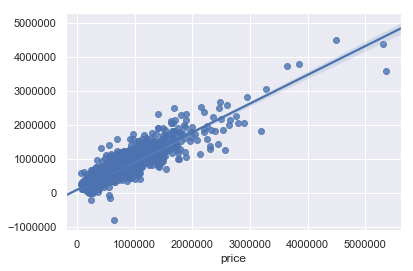

In [110]:
sns.regplot(test_data_dm['price'],pred)